# Neural Networks

G. Richards (2016,2018), where I found this video series particularly helpful in trying to simplify the explanation https://www.youtube.com/watch?v=bxe2T-V8XRs.  Thanks also to Vince Baker (Drexel).

[Artificial Neural Networks](https://en.wikipedia.org/wiki/Artificial_neural_network) are a simplified computation architecture based loosely on the real neural networks found in brains. 

In the image below the circles on the left represent the **attributes** of our input data, $X$, which here is 3 dimensional.  The circles in the middle represent the neurons.  They take in the information from the input and, based on some criterion decide whether or not to "fire".  The collective results of the neurons in the hidden layer produce the output, $y$, which is represented by the circles on the right, which here is 2 dimensional result.  The lines connecting the circles represent the synapses.  This is a simple example with just one layer of neurons; however, there can be many layers of neurons.
![Cartoon of Neural Network](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Artificial_neural_network.svg/500px-Artificial_neural_network.svg.png)

In more detail:

The job of a synapses is to take input values and multiply them by some weight before passing them to the neuron (hidden layer):

$$z = \sum_i w x_i$$

The neuron then sums up the inputs from all of the synapses connected to it and applies an "activation function".  For example a [sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) activation function.

$$a = \frac{1}{1+e^{-z}}.$$

![Sigmoid Function](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/500px-Logistic-curve.svg.png)

What the neural network does is to learn the weights of the synapses that are needed to produce an accurate model of $y_{\rm train}$.

Rather than think about the inputs individually, we can write this process in matrix form as
$$X W^{(1)} = Z^{(2)}.$$

If $D$ is the number of attributes (here 3) and $H$ is the number of neurons in the hidden layer (here 4), then $X$ is an $N\times D$ matrix, while $W^{(1)}$ is a $D\times H$ matrix.  The result, $Z^{(2)}$, is then an $N\times H$ matrix.

We then apply the activation function to each entry of $Z^{(2)}$ independently: 
$$A^{(2)} = f(Z^{(2)}),$$
where $A^{(2)}$ is the output of the neurons in the hidden layer and is also $N\times H$.

These values are then the inputs for the next set of synapses, where we multiply the inputs by another set of weights, $W^{(2)}:$
$$A^{(2)} W^{(2)} = Z^{(3)},$$

where $W^{(2)}$ is an $H\times O$ matrix and $Z^{(3)}$ is an $N\times O$ matrix with $O$-dimensional output.

Another activation function is then applied to $Z^{(3)}$ to give
$$\hat{y} = f(Z^{(3)}),$$
which is our estimator of $y$.

For example we might have $N=100$ people for which we have measured 
* shoe size
* belt size
* hat size

for whom we know their height and weight.  

Then we are going to use this to predict the height and weight for people where we only know shoe size, belt size, and hat size.


The neural network then essentially boils down to determining the weights, which are usually initialized randomly.

We do that by minimizing the cost function (which compares the true values of $y$ to our predicted values).  Typically:
$$ {\rm Cost} = J = \sum\frac{1}{2}(y - \hat{y})^2.$$

If we just had 1 weight and we wanted to check 1000 possible values, that wouldn't be so bad.  But we have 20 weights, which means checking $20^{1000}$ possible combinations.    Remember the curse of dimensionality?  That might take a while.  Indeed, far, far longer than the age of the Universe.

How about just checking 3 points for each weight and see if we can at least figure out which way is "down hill"?  That's a start.

We can rewrite $J$ as
$$ J = \sum\frac{1}{2}\left(y - f\left( f(X W^{(1)}) W^{(2)} \right) \right)^2$$

and then compute
$$\frac{\partial J}{\partial W}$$
in order to determine the slope of the cost function for each weight.  This is the **gradient descent** method.

We'll want $\partial J/\partial W^{(1)}$ and $\partial J/\partial W^{(2)}$ separately.  This allows us to [*backpropagate*](https://en.wikipedia.org/wiki/Backpropagation) the error contributions along each neuron and to change the weights where they most need to be changed.  It is like each observations gets a vote on which way is "down hill".  We compute the vector sum to decide the ultimate down hill direction.

Once we know the down hill direction from the derivative, we update the weights by subtracting a scalar times that derivative from the original weights.  That's obviously much faster than randomly sampling all the possible combinations of weights.  Once the weights are set, then you have your Neural Network classifier/regressor.

![Cartoon of Neural Network](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Artificial_neural_network.svg/500px-Artificial_neural_network.svg.png)

Scikit-Learn has both [unsupervised Neural Network](http://scikit-learn.org/stable/modules/neural_networks_unsupervised.html#neural-networks-unsupervised) and [supervised Neural Network](http://scikit-learn.org/stable/modules/neural_networks_supervised.html#neural-networks-supervised) examples.  Apparently these are new as Jake VanderPlas didn't know about them.

Let's try to use the multi-layer perceptron classifier on the Boston House Price dataset (using 75% of the data for training and 25% for testing).

In [2]:
#Execute this cell after making the test set 25% of the total data set.
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

boston = load_boston()
#print boston.DESCR

X = boston.data
y = boston.target

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)

[(13, 5), (5, 2), (2, 1)]


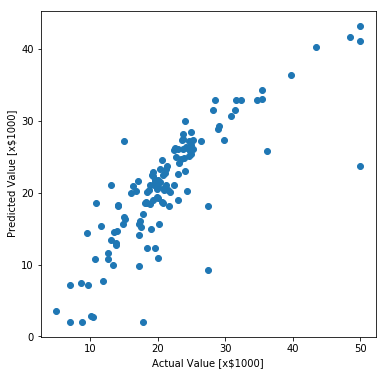

In [4]:
from sklearn.neural_network import MLPRegressor
clf = MLPRegressor(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,2), random_state=1)
clf.fit(Xtrain, ytrain)

# Look at the weights
print([coef.shape for coef in clf.coefs_])

ypred = clf.predict(Xtest)
#print ypred, ytest

fig = plt.figure(figsize=(6, 6))
plt.scatter(ytest,ypred)
plt.xlabel("Actual Value [x$1000]")
plt.ylabel("Predicted Value [x$1000]")
plt.show()

Of course, that only predicts the value for a fraction of the data set.  Again, we can use Scikit-Learn's [cross_val_predict](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html#sklearn.model_selection.cross_val_predict) to make predictions for the full data set.

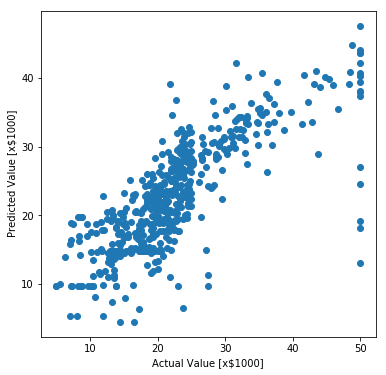

In [5]:
from sklearn.model_selection import cross_val_predict

yCVpred = cross_val_predict(clf, X, y, cv=10) # Complete

fig = plt.figure(figsize=(6, 6))
plt.scatter(y,yCVpred)
plt.xlabel("Actual Value [x$1000]")
plt.ylabel("Predicted Value [x$1000]")
plt.show()

Recent interest in neural networks surged in 2012 when a team using a deep convolutional neural network acheived record results classifying objects in the [ImageNet](http://image-net.org/) data set.

This is clearly much more sophisticated than our basic perceptron. "Deep" networks consist of tens of layers with thousands of neurons. These large networks have become usabel thanks to two breakthroughs: the use of sparse layers and the power of graphics processing units (GPUs).
Many image processing tasks involve convolving an image with a 2-dimensional kernel as shown below.
![Convolution example](https://developer.apple.com/library/content/documentation/Performance/Conceptual/vImage/Art/kernel_convolution.jpg)
The sparse layers or convolutional layers in a deep network contain a large number of hidden nodes but very few synapses. The sparseness arises from the relatively small size of a typical convolution kernel (15x15 is a large kernel), so a hidden node representing one output of the convolution is connected to only a few input nodes. Compare this the our previous perceptron, in which every hidden node was connected to every input node.

Even though the total number of connections is greatly reduced in the sparse layers, the total number of nodes and connections in a modern deep network is still enormous. Luckily, training these networks turns out to be a great task for GPU acceleration! Serious work using neural networks is almost always done usign specialized GPU-accelerated platforms.